### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 
 
 
#### A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits

In [147]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [26]:
df =pd.read_excel("C:\\Users\\User\\Downloads\\Capstone\\bank-full - Copy.xlsx")

In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [29]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Target Variable Value Counts

In [30]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [31]:
df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

88 % of the data is of people who haven't subsribed to the term deposit and around 12 % is of those who subscribed.

In [32]:
df2=df.copy()

In [33]:
df['y']=df['y'].map({'no':0,'yes':1})

In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### Missing/Unknown Values 

In [35]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no 'Nan' or Null values in the dataset, let's look into each variable to get better insights about the data.

### Analysing Categorical Variables

In [36]:
cat_col = df.select_dtypes('object').columns

In [37]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [38]:
for i in cat_col:
    
    print("Feature : ",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Feature :  job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64


Feature :  marital
married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64


Feature :  education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64


Feature :  default
no     0.981973
yes    0.018027
Name: default, dtype: float64


Feature :  housing
yes    0.555838
no     0.444162
Name: housing, dtype: float64


Feature :  loan
no     0.839774
yes    0.160226
Name: loan, dtype: float64


Feature :  contact
cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64


Feature :  month
may    0.30

Unknowns present in job, education,contact and poutcome

#### 1. Poutcome

In [39]:
df['poutcome'].value_counts(normalize=True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

About 82% of the data is 'unknown'

In [40]:
df[df['poutcome']=='unknown'][['pdays','poutcome']]

,pdays,poutcome
0,-1,unknown
1,-1,unknown
2,-1,unknown
3,-1,unknown
4,-1,unknown
...,...,...
45203,-1,unknown
45205,-1,unknown
45206,-1,unknown
45207,-1,unknown


In [41]:
df[(df['poutcome']=='unknown') & (df['pdays']!=-1)][['pdays','poutcome']]

,pdays,poutcome
40658,98,unknown
41821,168,unknown
42042,188,unknown
43978,416,unknown
45021,528,unknown


In [42]:
df[df['pdays']==-1].shape

(36954, 17)

In [43]:
df[(df['poutcome']=='unknown') & (df['pdays']==-1)].shape

(36954, 17)

36954 people were not previously contacted before this campaign, so for these records, poutcome can be changed from unknown to 'not_contacted_prev'

5 records present where they were contacted previously , but we do not have outcome of the same. (pdays != -1 and poutcome is unknown)

In [44]:
df.loc[(df['poutcome']=='unknown') & (df['pdays']==-1),'poutcome'] = 'not_contacted_prev'

In [45]:
df[(df['poutcome']=='not_contacted_prev') & (df['pdays']==-1)].shape

(36954, 17)

In [46]:
df[df['poutcome']=='other']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24086,44,blue-collar,married,secondary,no,1324,yes,no,telephone,25,oct,119,1,89,2,other,0
24122,26,technician,single,tertiary,no,172,no,yes,telephone,4,nov,21,1,140,4,other,0
24136,34,management,married,tertiary,no,1770,yes,no,unknown,6,nov,26,1,101,11,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45153,64,retired,married,tertiary,no,2059,no,yes,cellular,9,nov,326,1,95,1,other,0
45165,33,technician,married,tertiary,no,2976,yes,no,cellular,9,nov,465,2,95,12,other,0
45170,19,student,single,primary,no,245,no,no,telephone,10,nov,98,2,110,2,other,0
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0


In [47]:
df[(df['poutcome']=='other') & (df['pdays']==-1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


As we have limited domain knowledge about what 'others' signify in poutcome, let us keep it as it is and assume that these were people who did not take a decision to either subscribe or not for the previous campaign.

Analysis of feature : 'Poutcome'


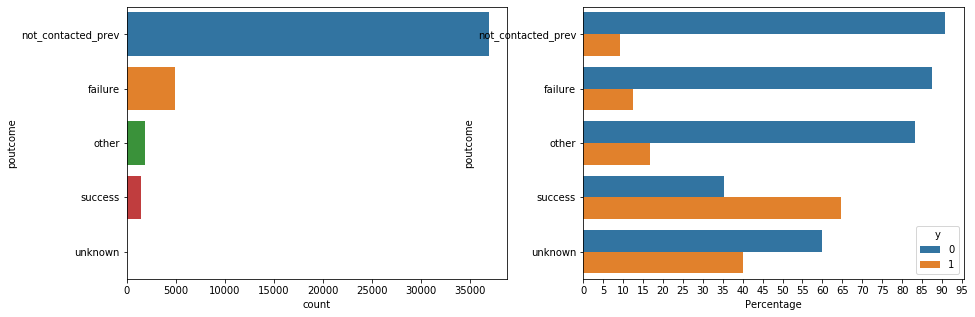

In [48]:
print("Analysis of feature : 'Poutcome'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='poutcome',order=df['poutcome'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['poutcome']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='poutcome',x='Percentage',hue='y',data=prop_df,order=df['poutcome'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [49]:
prop_df

,poutcome,y,Percentage
0,failure,0,87.390329
1,failure,1,12.609671
2,not_contacted_prev,0,90.842669
3,not_contacted_prev,1,9.157331
4,other,0,83.315217
5,other,1,16.684783
6,success,1,64.725347
7,success,0,35.274653
8,unknown,0,60.000000
9,unknown,1,40.000000


Majority of the people have not been contacted in the previous campaign for term deposit.

The people who have subscribed for a term deposit in the previous campaign has 65% chances of subscribing it again in the current campaign. These customers can be targeted more to increase the rate of subscription.

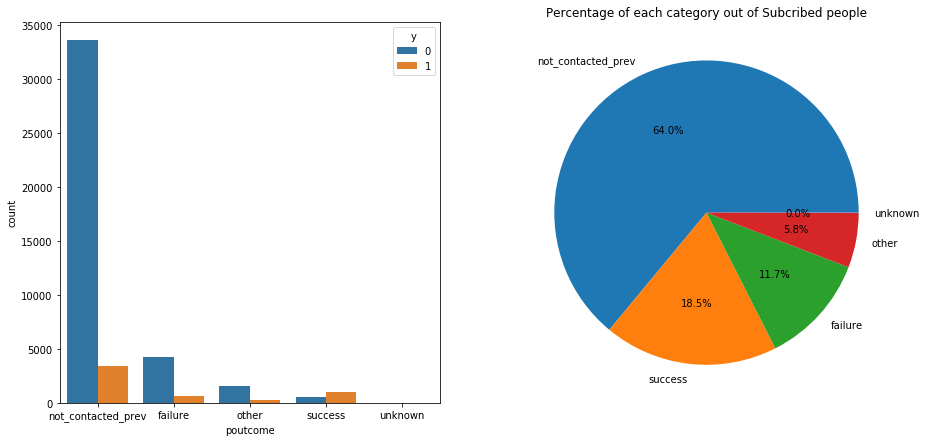

In [50]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(x='poutcome',data=df,hue='y',ax=ax1[0])
prop_df = (df['poutcome'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['poutcome'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed people, most of the people are not contacted in the previous campaign, followed by people who subscribed for term deposit inthe previous campaign.

### 2. Job

In [51]:
df['job'].value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

There are 12 categories present in the job feature, in which one is 'unknown'.

Blue collar jobs followed by management jobs and technician jobs are most common in the dataset.

In [52]:
df[df['job']=='unknown'].shape

(288, 17)

In [53]:
df[(df['job']=='unknown') & (df['pdays']==-1)].shape

(255, 17)

There are 288 'unknown' values(0.637%) present in the field 'job'. Out of which the majority of the records (255) are of people who were not contacted in the previous campaign.

Analysis of feature : 'Job'


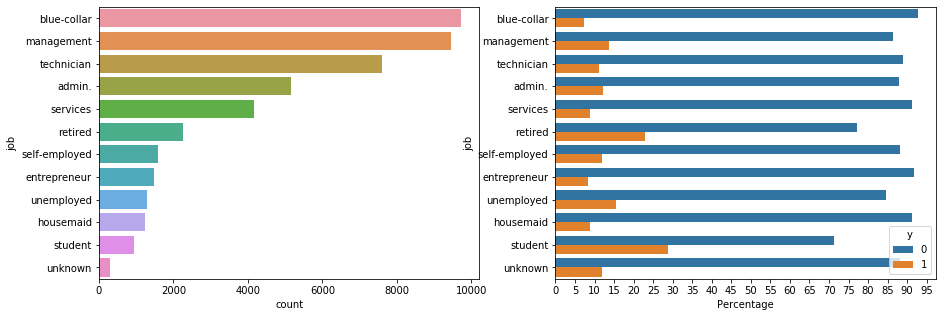

In [54]:
print("Analysis of feature : 'Job'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='job',order=df['job'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['job']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='job',x='Percentage',hue='y',data=prop_df,order=df['job'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [55]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,job,y,Percentage
17,student,1,28.678038
11,retired,1,22.791519
21,unemployed,1,15.502686
9,management,1,13.755551
1,admin.,1,12.202669
13,self-employed,1,11.842939
23,unknown,1,11.805556
19,technician,1,11.056996
15,services,1,8.883004
7,housemaid,1,8.790323


Students and retired customers are more likely to subscribe to the term deposit compared to other job categories.

These customers can be targeted more to increase the rate of subscription.

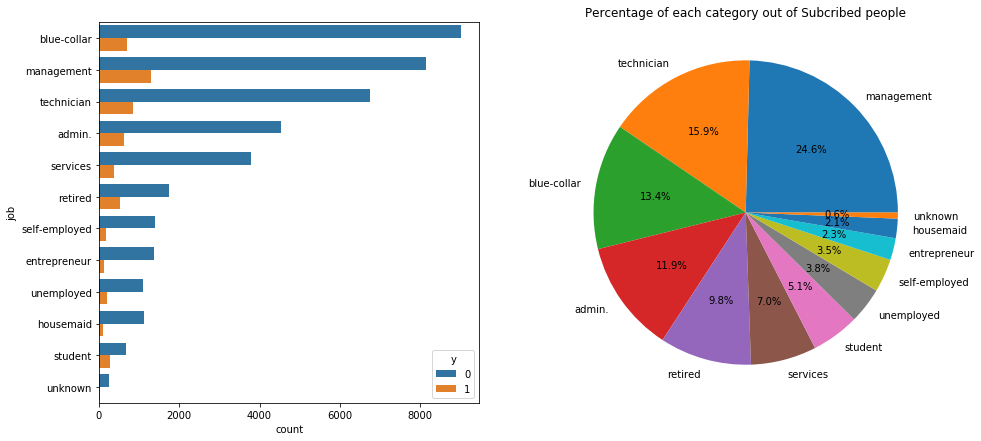

In [56]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='job',data=df,hue='y',order=df['job'].value_counts().index,ax=ax1[0])
prop_df = (df['job'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['job'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most common jobs are 'management' followed by 'technician' and 'blue collar' jobs.

### 3. Education

In [57]:
df['education'].value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

There are 4 categories present in the education feature, in which one is 'unknown'.

51% of the customers are having secondary education.

In [58]:
df[df['education']=='unknown'].shape

(1857, 17)

In [59]:
df[(df['education']=='unknown') & (df['pdays']==-1)].shape

(1534, 17)

There are 1857 'unknown' values(4.1%) present in the field 'education'. Out of which the majority of the records (1534) are of people who were not contacted in the previous campaign.

Analysis of feature : 'Education'


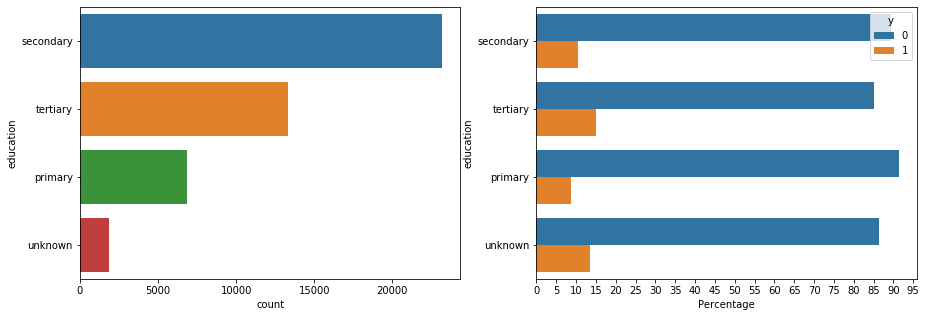

In [60]:
print("Analysis of feature : 'Education'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='education',order=df['education'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['education']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='education',x='Percentage',hue='y',data=prop_df,order=df['education'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [61]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,education,y,Percentage
5,tertiary,1,15.006390
7,unknown,1,13.570275
3,secondary,1,10.559435
1,primary,1,8.626478


The customers with teritiary level of education has slightly higher chances of subscription of the term deposit, compared to other education levels.

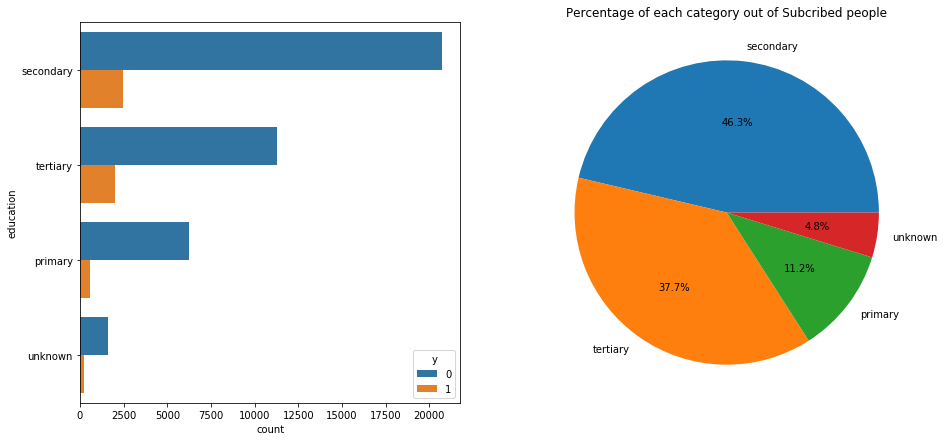

In [62]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='education',data=df,hue='y',order=df['education'].value_counts().index,ax=ax1[0])
prop_df = (df['education'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['education'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most customers have secondary level of education followed by teritiary.

### 4. Marital

In [63]:
df['marital'].value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

There are 3 categories present in the marital feature.

60% of the customers are married.

Analysis of feature : 'Marital'


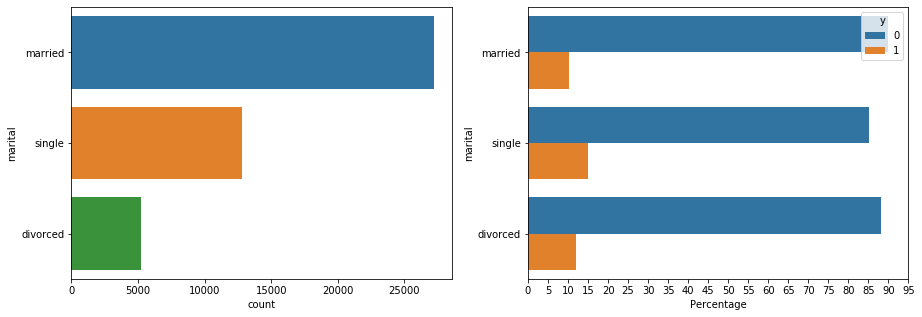

In [64]:
print("Analysis of feature : 'Marital'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='marital',order=df['marital'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['marital']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='marital',x='Percentage',hue='y',data=prop_df,order=df['marital'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [65]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,marital,y,Percentage
5,single,1,14.949179
1,divorced,1,11.945458
3,married,1,10.123466


The customers who are single has a slightly higher chances of subscription of the term deposit compared to customers who are married or divorced.

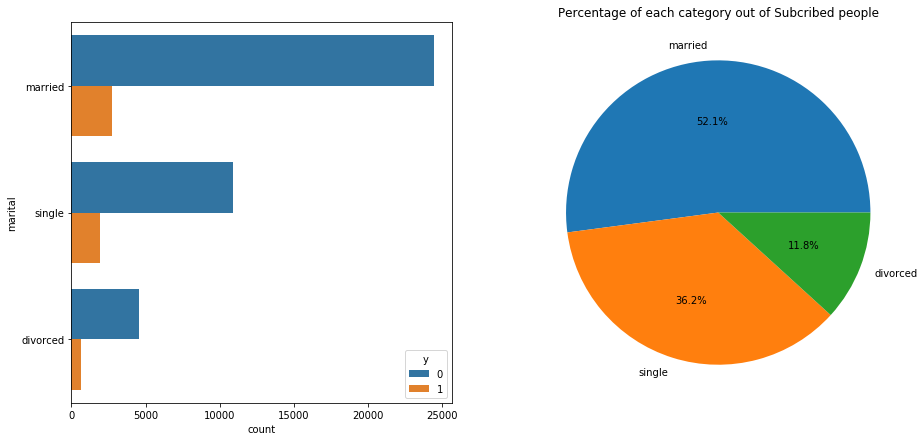

In [66]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='marital',data=df,hue='y',order=df['marital'].value_counts().index,ax=ax1[0])
prop_df = (df['marital'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['marital'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most customers are married followed by single customers.

### 5. Default

In [67]:
df['default'].value_counts(normalize=True)

no     0.981973
yes    0.018027
Name: default, dtype: float64

98 % of the customers are do not have any credit in default.

Analysis of feature : 'Default'


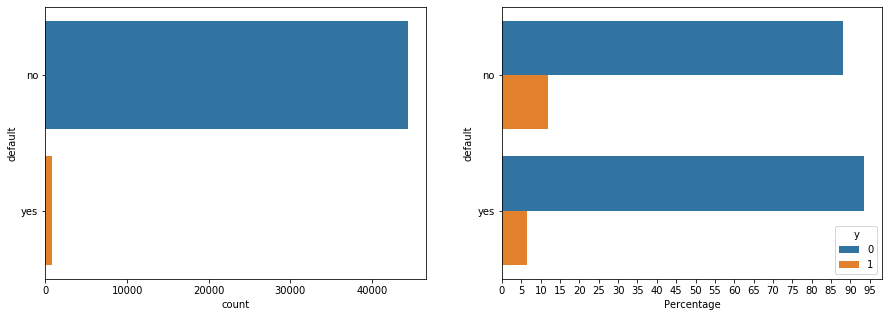

In [68]:
print("Analysis of feature : 'Default'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='default',order=df['default'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['default']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='default',x='Percentage',hue='y',data=prop_df,order=df['default'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [69]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,default,y,Percentage
1,no,1,11.796108
3,yes,1,6.380368


The customers who do not have any credits in default, has a slightly higher chances of subscription of the term deposit compared to customers who have credits in default.

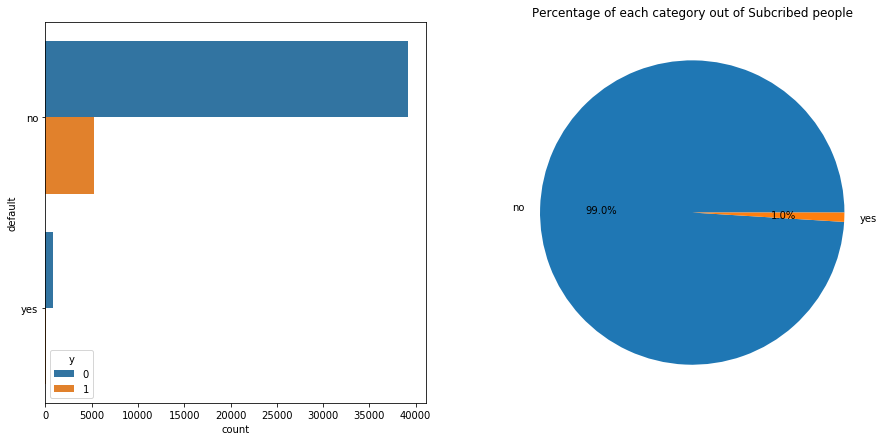

In [70]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='default',data=df,hue='y',order=df['default'].value_counts().index,ax=ax1[0])
prop_df = (df['default'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['default'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most customers do not have any credits in default.

### 6. Housing

In [71]:
df['housing'].value_counts(normalize=True)

yes    0.555838
no     0.444162
Name: housing, dtype: float64

55.5% of the customers have taken housing loans while the other 45.5% do not have any housing loans in their name.

Analysis of feature : 'Housing'


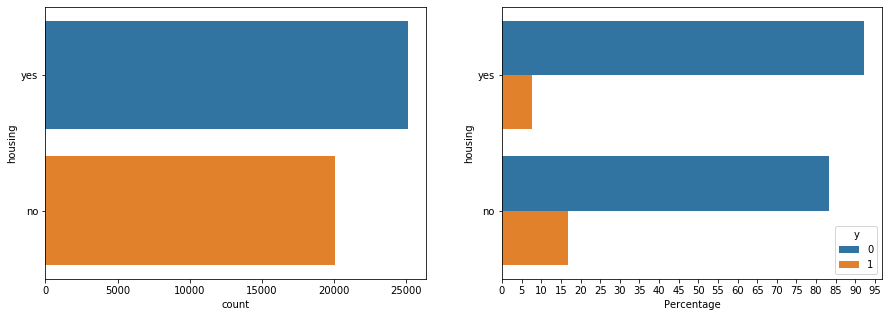

In [72]:
print("Analysis of feature : 'Housing'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='housing',order=df['housing'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['housing']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='housing',x='Percentage',hue='y',data=prop_df,order=df['housing'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [73]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,housing,y,Percentage
1,no,1,16.702355
3,yes,1,7.699960


The customers who do not have a housing loan has a slightly higher chances of subscription of the term deposit compared to customers who already have a housing loan.

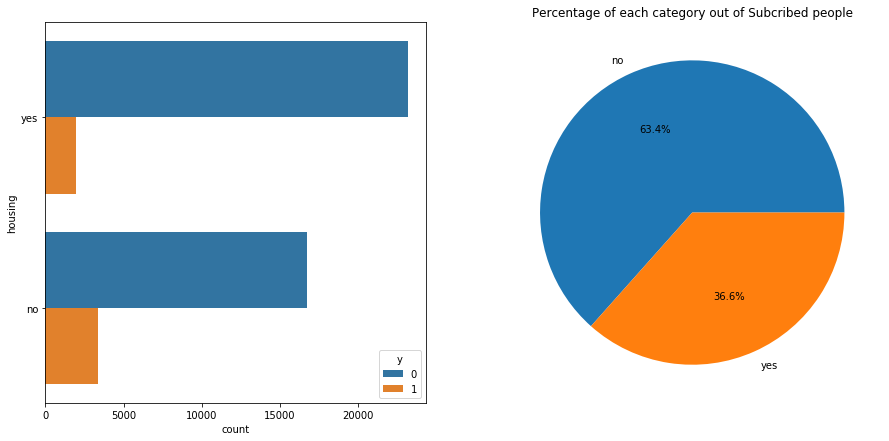

In [74]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='housing',data=df,hue='y',order=df['housing'].value_counts().index,ax=ax1[0])
prop_df = (df['housing'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['housing'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most customers do not have housing loans.

### 7. Loan

In [75]:
df['loan'].value_counts(normalize=True)

no     0.839774
yes    0.160226
Name: loan, dtype: float64

84% of the customers have not taken personal loans while the other 16% have personal loans in their name.

Analysis of feature : 'Loan'


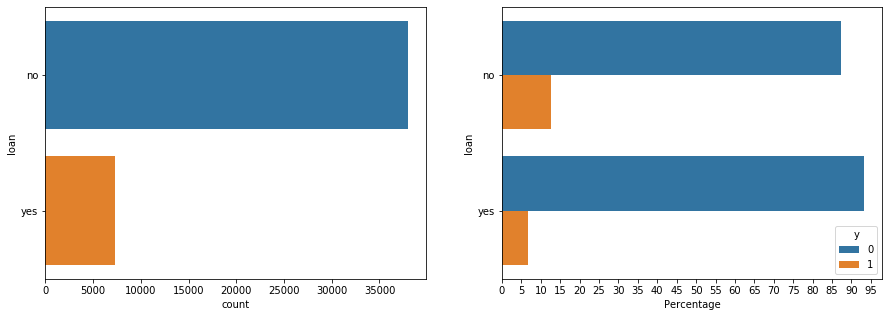

In [76]:
print("Analysis of feature : 'Loan'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='loan',order=df['loan'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['loan']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='loan',x='Percentage',hue='y',data=prop_df,order=df['loan'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [77]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,loan,y,Percentage
1,no,1,12.655727
3,yes,1,6.681391


The customers who do not have a personal loan has a slightly higher chances of subscription of the term deposit compared to customers who already have a personal loan.

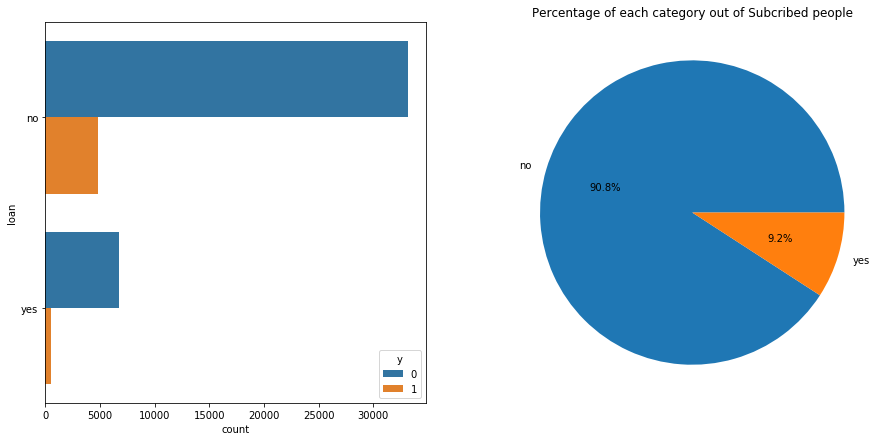

In [78]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='loan',data=df,hue='y',order=df['loan'].value_counts().index,ax=ax1[0])
prop_df = (df['loan'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['loan'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most customers (90 %) do not have personal loans.

### 8. Contact

In [79]:
df['contact'].value_counts(normalize=True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

There are 3 modes of contact here, out of which one is unknown(28.7%).

64.7% of the customers have cellular mode of contact.

Analysis of feature : 'Contact'


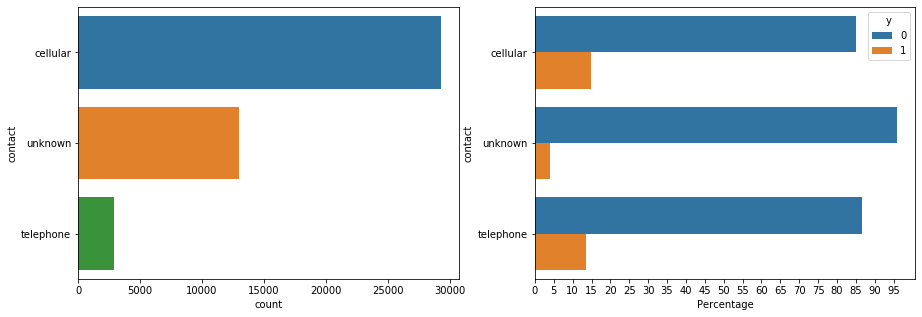

In [80]:
print("Analysis of feature : 'Contact'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='contact',order=df['contact'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['contact']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='contact',x='Percentage',hue='y',data=prop_df,order=df['contact'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [81]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,contact,y,Percentage
1,cellular,1,14.918900
3,telephone,1,13.420509
5,unknown,1,4.070661


The customer's mode of contact do not have any significant effect on subscription to the term deposit.

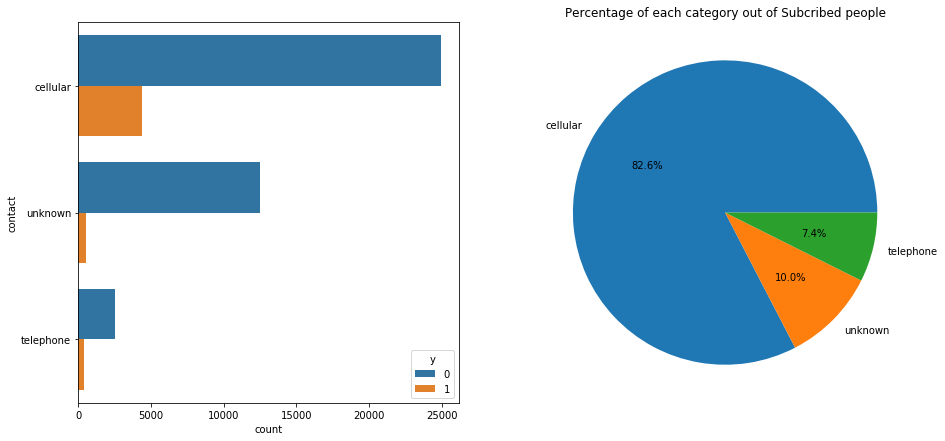

In [82]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='contact',data=df,hue='y',order=df['contact'].value_counts().index,ax=ax1[0])
prop_df = (df['contact'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['contact'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most customers (82.6 %) have cellular mode of contact.

### 9. Month

In [83]:
df['month'].value_counts(normalize=True)

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

Most of the customers were contacted in the month of May (30.4%), July (15.2%) and Aug (13 %).

Analysis of feature : 'month'


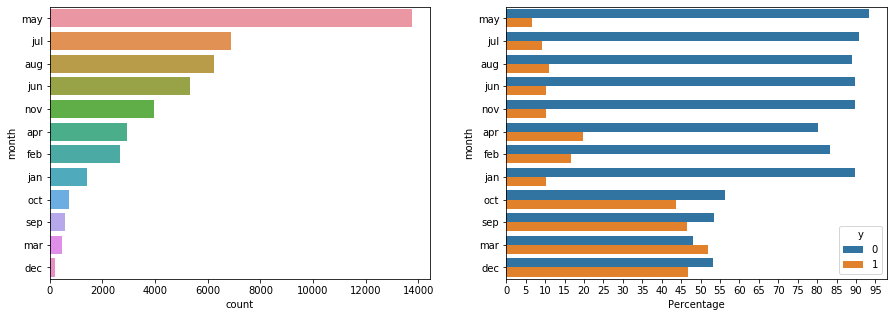

In [84]:
print("Analysis of feature : 'month'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='month',order=df['month'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['month']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='month',x='Percentage',hue='y',data=prop_df,order=df['month'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [85]:
prop_df = (df['y'].groupby(df['month']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
prop_df

,month,y,Percentage
0,apr,0,80.320600
1,apr,1,19.679400
2,aug,0,88.986714
3,aug,1,11.013286
4,dec,0,53.271028
5,dec,1,46.728972
6,feb,0,83.352208
7,feb,1,16.647792
8,jan,0,89.878831
9,jan,1,10.121169


In [86]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,month,y,Percentage
14,mar,1,51.991614
5,dec,1,46.728972
23,sep,1,46.459413
21,oct,1,43.766938
1,apr,1,19.679400
7,feb,1,16.647792
3,aug,1,11.013286
13,jun,1,10.222805
19,nov,1,10.151134
9,jan,1,10.121169


The customers who were contacted in the months - March, December, September and October has a higher chances of subsription than the customers who were contacted on the other months.

More calls to customers can be made in the last month of the last three quarters(Q2-September, Q3-December, Q4-March) of a Financial year to increase the rate of subscription.

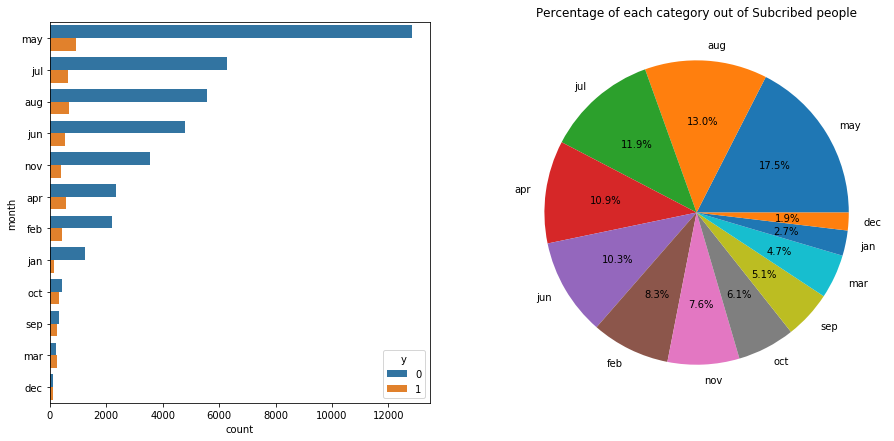

In [87]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='month',data=df,hue='y',order=df['month'].value_counts().index,ax=ax1[0])
prop_df = (df['month'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['month'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, 17.5% subscribed in the month of May, 13% in the month of August and 11.9% in the month of July.

In [88]:
prop_df

,y,month,Values
12,1,may,925
13,1,aug,688
14,1,jul,627
15,1,apr,577
16,1,jun,546
17,1,feb,441
18,1,nov,403
19,1,oct,323
20,1,sep,269
21,1,mar,248


Job:- Most contacted - Blue collar, campaign successful mostly among students followed by retired people.

Marital- Most contacted - Married, campaign successful mostly among single people.

Education - Most contacted - Secondary, campaign successful mostly among people with teritiary education.

Default - Most contacted - people with no defaults, campaign successful mostly among people with no defaults

Housing - Most contacted - people who have taken housing loans, campaign successful mostly among people who have not taken housing loans

Loan - Most contacted - people who have taken housing loans, campaign successful mostly among people who have not taken housing loans

Contact - Most contacted - Cellular, campaign successful in similar rates among people contacted through telephone as well as cellular.

Month -  Most contacted - May, campaign successful mostly among people contacted during the months March, December, September and October.

In [89]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [90]:
df[df['education']=='unknown'].shape

(1857, 17)

In [91]:
df[(df['education']=='unknown') & (df['pdays']==-1)].shape

(1534, 17)

In [92]:
df[df['contact']=='unknown'].shape

(13020, 17)

In [93]:
df[(df['contact']=='unknown') & (df['pdays']==-1)].shape

(12950, 17)

Most of the records with 'unkowns' as a category in the features - job, education,contact and poutcome are data of people who haven't been contacted in the previous campaign.

### Numerical Variable analysis

In [165]:
num_cols = df.select_dtypes('int64').columns

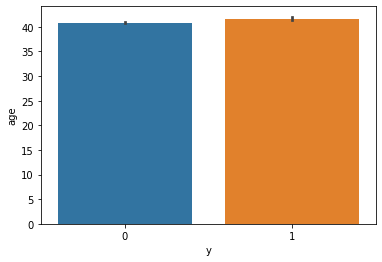

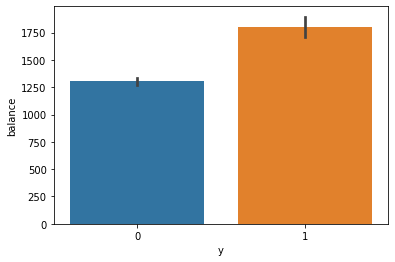

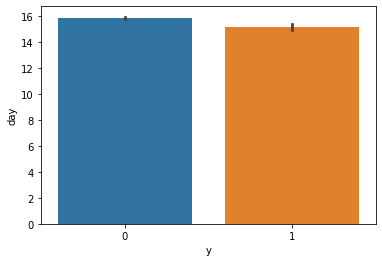

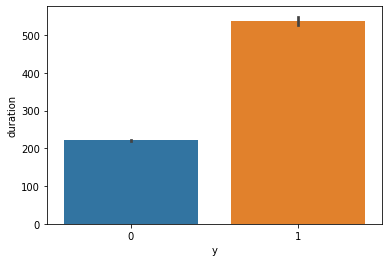

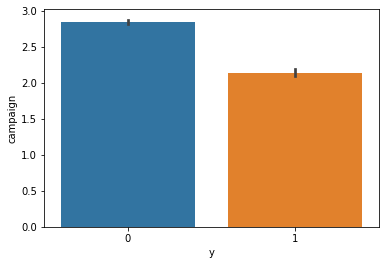

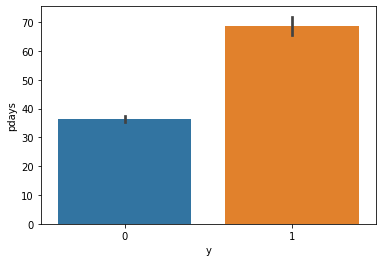

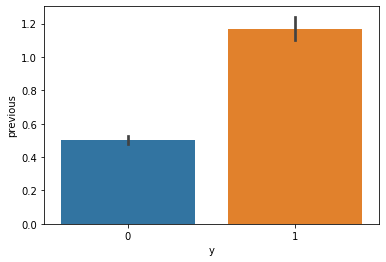

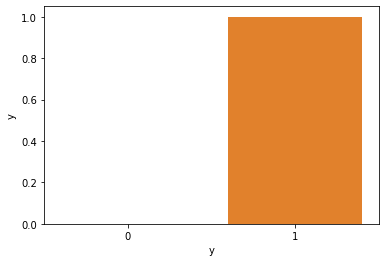

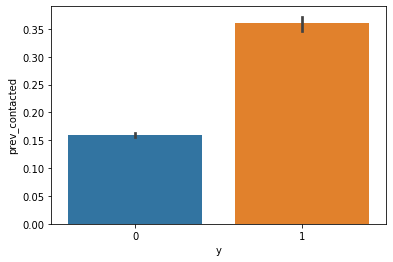

In [166]:
for i in num_cols:
    sns.barplot(x='y',y=i,data = df)
    plt.show()

Balance, duration,campaign, pdays, previous are having considerable difference in both classes.

### Age

In [227]:
df_age = df.copy()

In [229]:
df_age['age'].describe()

count    45208.000000
mean        40.936294
std         10.618823
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [230]:
df_age['age'].quantile(.2),df_age['age'].quantile(.4),df_age['age'].quantile(.6),df_age['age'].quantile(.8)

(32.0, 36.0, 42.0, 51.0)

In [232]:
def age_split(x):
    if(x<=32):
        return '18-32'
    elif((x>32) & (x<=36)):
        return '32-36'
    elif((x>36) & (x<=42)):
        return '37-42'
    elif((x>42) & (x<=51)):
        return '43-51'
    else:
        return '52 and above'

In [233]:
df_age['age_group']=list(map(age_split,df_age['age']))

In [234]:
df_age['age_group'].value_counts()

18-32           11110
43-51            9642
37-42            8537
52 and above     8318
32-36            7601
Name: age_group, dtype: int64

#### Age group analysis

Analysis of feature : 'Age_group'


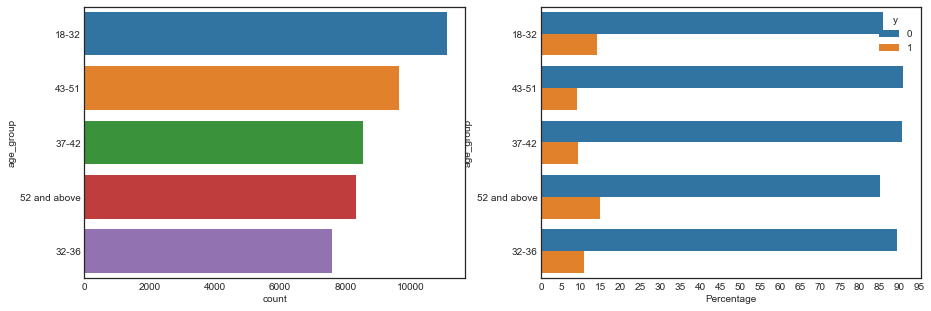

In [236]:
print("Analysis of feature : 'Age_group'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='age_group',order=df_age['age_group'].value_counts().index,data=df_age,ax=ax1[0])
prop_df = (df_age['y'].groupby(df_age['age_group']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='age_group',x='Percentage',hue='y',data=prop_df,order=df_age['age_group'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [237]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,age_group,y,Percentage
9,52 and above,1,14.859341
1,18-32,1,14.149415
3,32-36,1,10.682805
5,37-42,1,9.417828
7,43-51,1,8.971168


Customers aged 52 and above and in the age group 18-32 are more likely to subscribe to the term deposit compared to other age groups

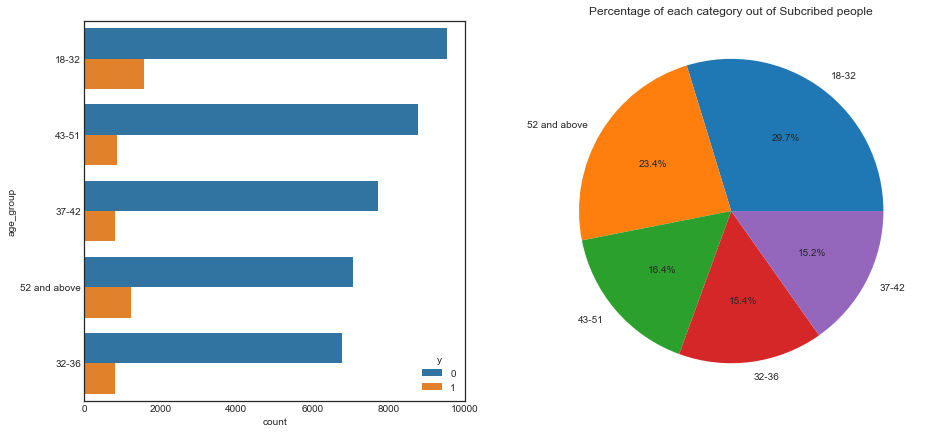

In [238]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='age_group',data=df_age,hue='y',order=df_age['age_group'].value_counts().index,ax=ax1[0])
prop_df = (df_age['age_group'].groupby(df_age['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['age_group'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most customers are also from the age groups 52 and above and 18-32.

### Distributions

In [167]:
df0=df[df['y']=='no']
df1=df[df['y']=='yes']

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


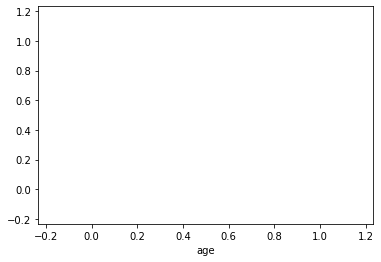

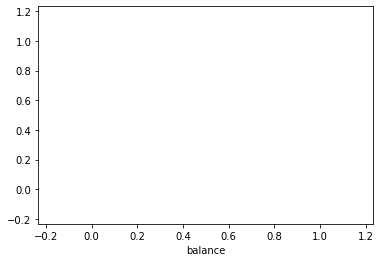

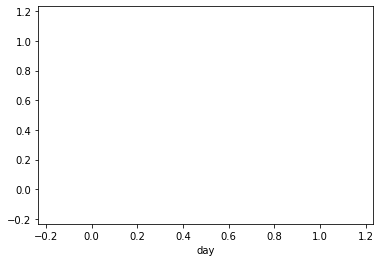

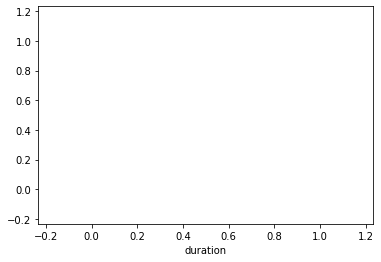

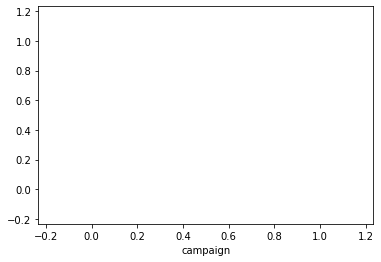

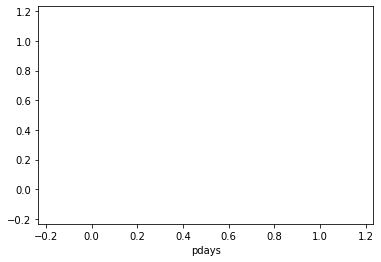

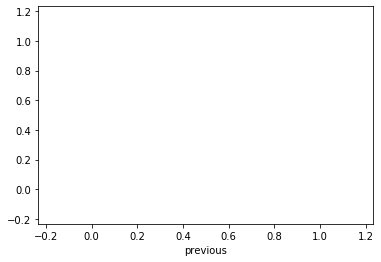

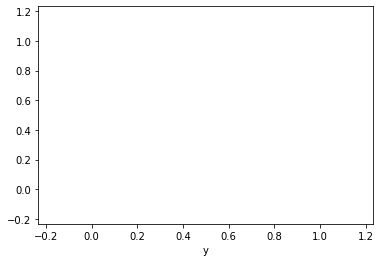

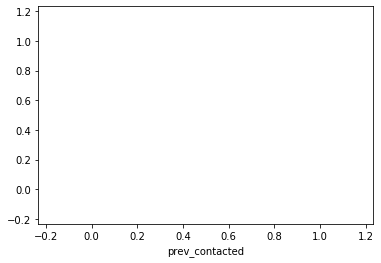

In [168]:
for i in num_cols:
    sns.distplot(df0[i])
    sns.distplot(df1[i])
    plt.show()

### Outliers

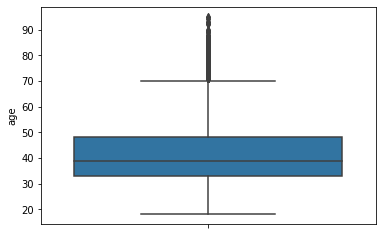

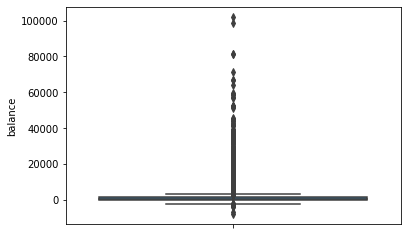

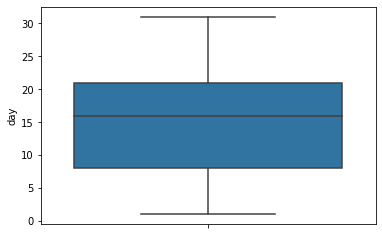

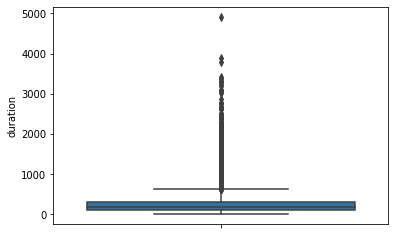

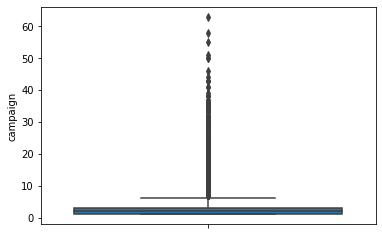

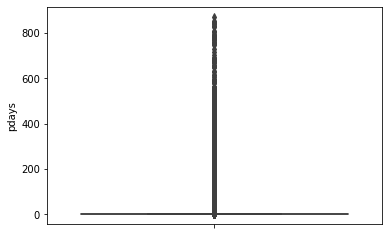

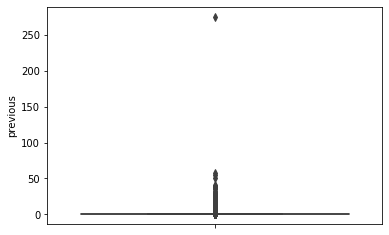

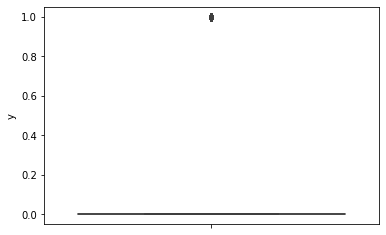

In [95]:
for i in num_cols:
    sns.boxplot(y=i,data = df)
    plt.show()

All numerical variables have high outliers and the distribution is highlky skewed.

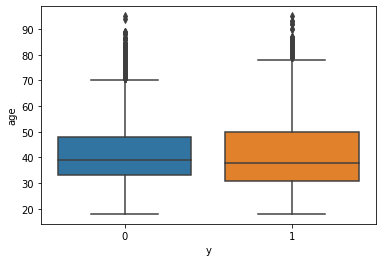

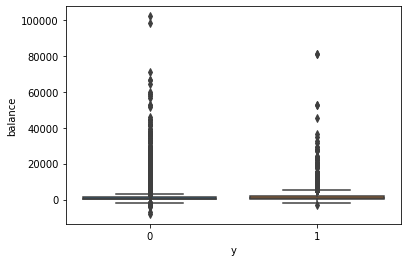

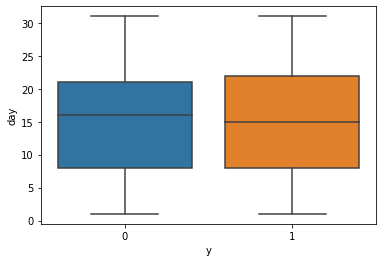

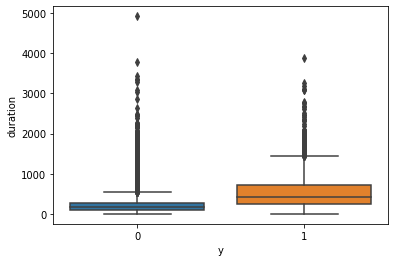

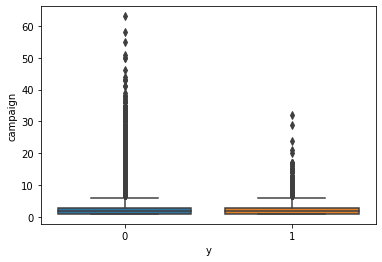

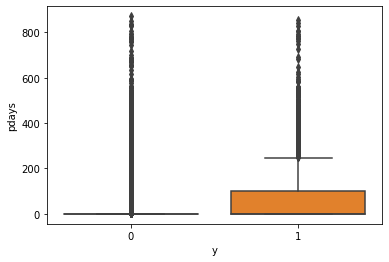

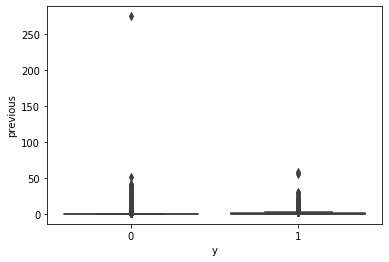

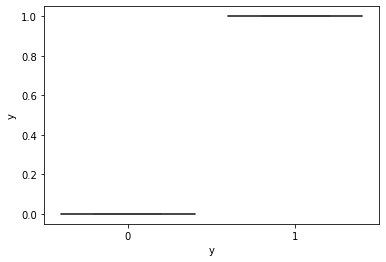

In [96]:
for i in num_cols:
    sns.boxplot(y=i,x='y',data = df)
    plt.show()

In [97]:
df3 = df.copy()

### Converting pdays to categorical, dropping records with duration = 0

In [98]:
df['prev_contacted'] = list(map(lambda x : 1 if x != -1 else 0,df['pdays']))

In [99]:
df.drop(df[df['duration']==0].index,inplace=True)

In [100]:
df.reset_index(drop=True, inplace=True)

In [101]:
df.shape

(45208, 18)

In [103]:
df_cat = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome','prev_contacted','y']]

In [104]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'previous']]

In [105]:
df_num.shape,df_cat.shape

((45208, 6), (45208, 11))

In [106]:
df[df['duration']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,prev_contacted


In [92]:
df_trans = df_num.copy()

### Outliers

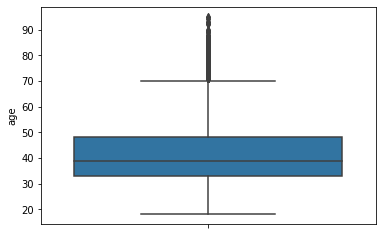

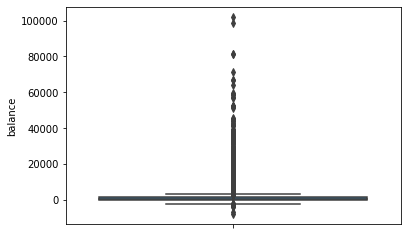

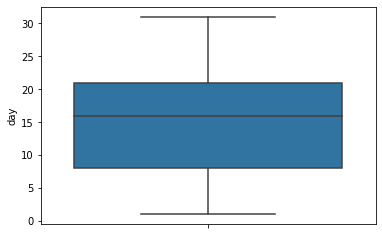

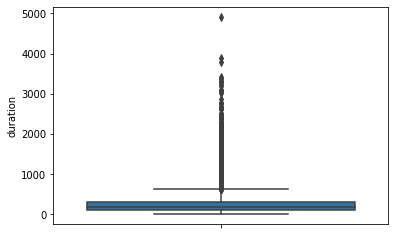

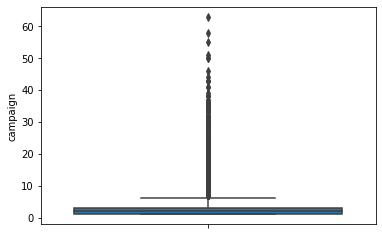

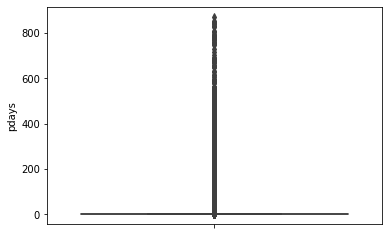

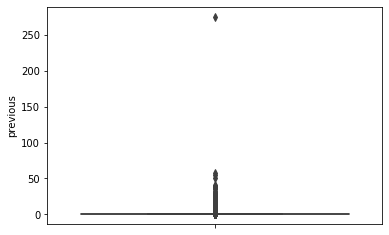

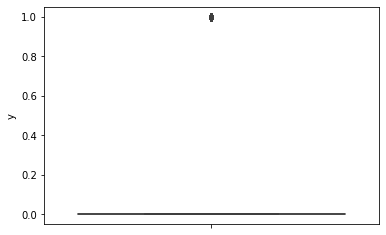

In [95]:
for i in num_cols:
    sns.boxplot(y=i,data = df)
    plt.show()

All numerical variables have high outliers and the distribution is highlky skewed.

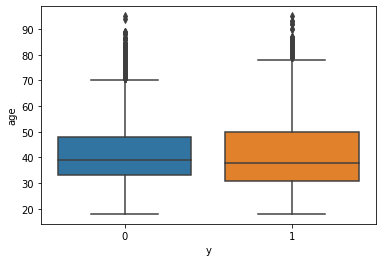

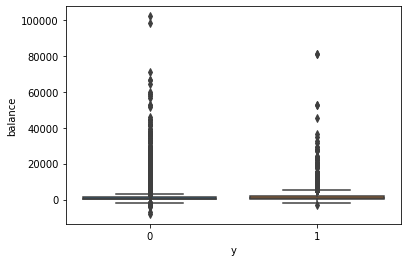

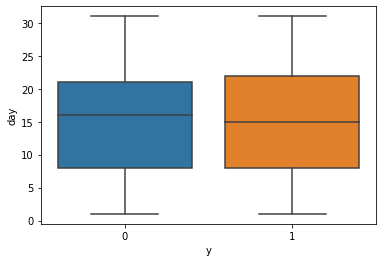

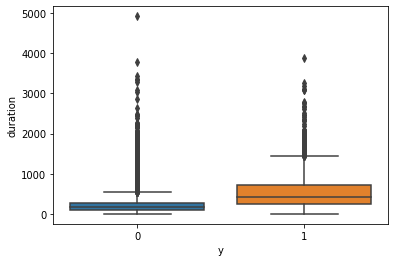

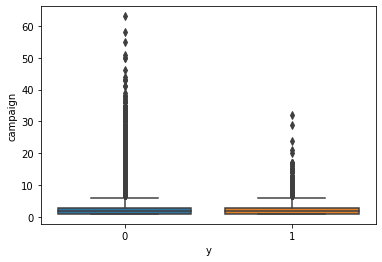

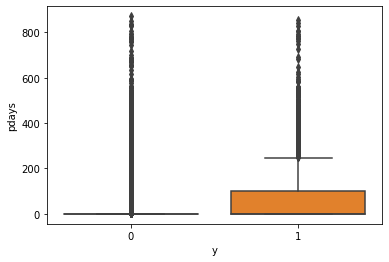

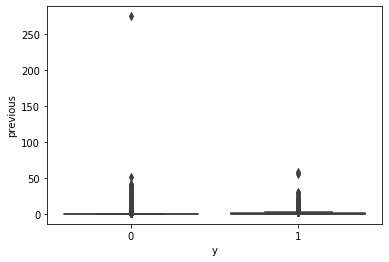

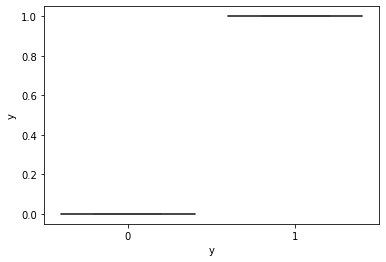

In [96]:
for i in num_cols:
    sns.boxplot(y=i,x='y',data = df)
    plt.show()

### Checking for outliers

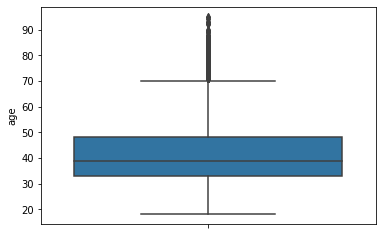

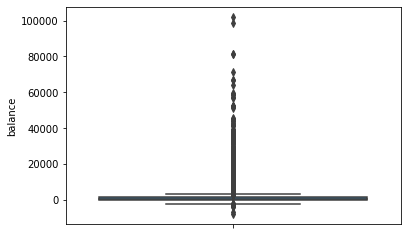

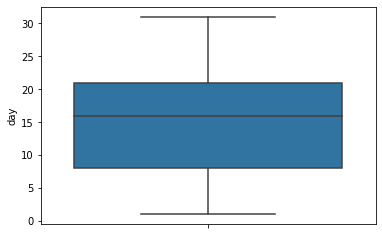

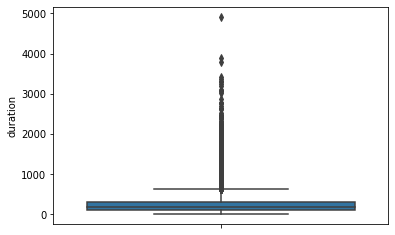

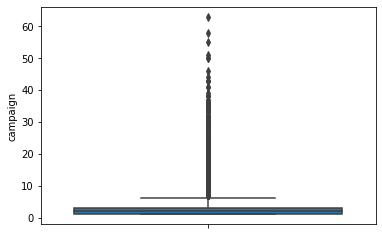

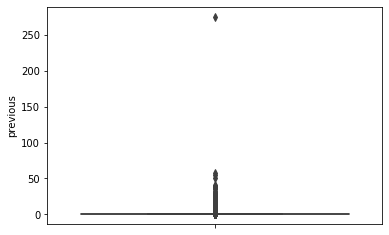

In [109]:
for i in df_num.columns:
    #sns.distplot(df_num[i])
    sns.boxplot(y=i,data=df_num)
    plt.show()

In [110]:
df_num.describe()

,age,balance,day,duration,campaign,previous
count,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000
mean,40.936294,1362.228676,15.806052,258.180211,2.763560,0.580362
std,10.618823,3044.794660,8.322417,257.527769,3.097582,2.303513
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000


### Outlier treated as NA- Modelling without features - pdays,previous and Power Transform

In [111]:
df[num_cols]

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45203,51,825,17,977,3,-1,0,1
45204,71,1729,17,456,2,-1,0,1
45205,72,5715,17,1127,5,184,3,1
45206,57,668,17,508,4,-1,0,0


In [112]:
df_out = df.copy()

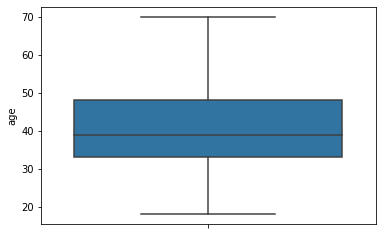

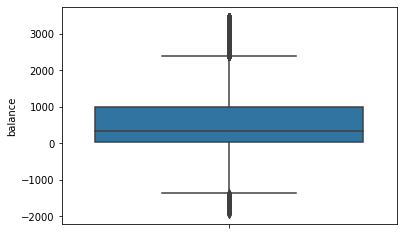

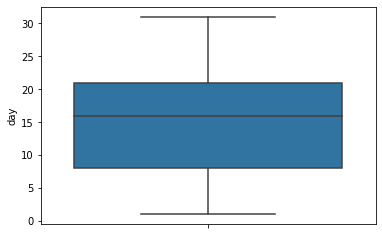

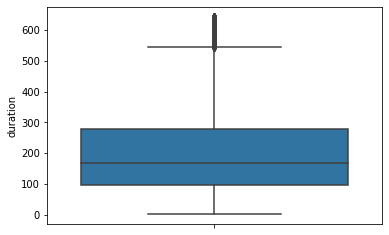

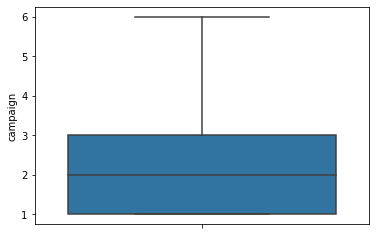

In [113]:
for i in num_cols[0:5]:
    q1=df_out[i].quantile(0.25)
    q3=df_out[i].quantile(0.75)
    iqr = q3-q1
    max_q = q3 + (1.5 * iqr)
    min_q = q1 - (1.5 * iqr)
    ##df_temp[i] = df_out[(df_out[i] >= min_q) & (df_out[i] <= max_q)]
    df_out.loc[(df_out[i] < min_q) | (df_out[i] > max_q),i] = np.nan
    sns.boxplot(y=i,data=df_out)
    plt.show()

In [114]:
df_out.isnull().sum()

age                487
job                  0
marital              0
education            0
default              0
balance           4728
housing              0
loan                 0
contact              0
day                  0
month                0
duration          3235
campaign          3063
pdays                0
previous             0
poutcome             0
y                    0
prev_contacted       0
dtype: int64

#### Using the dataset which has outliers as na, and missing values imputed using MICE

In [116]:
mice_imputed_outlier_na = pd.read_csv("mice_imputed_outlier_final_23June.csv",index_col=0)

In [117]:
mice_imputed_outlier_na

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,contactPrev,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,cellular,may,261.0,1.0,No,Not Contacted,no
1,44.0,technician,single,secondary,no,29.0,yes,no,cellular,may,151.0,1.0,No,Not Contacted,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,may,76.0,1.0,No,Not Contacted,no
3,47.0,blue-collar,married,secondary,no,1506.0,yes,no,cellular,may,92.0,1.0,No,Not Contacted,no
4,33.0,retired,single,secondary,no,1.0,no,no,cellular,may,198.0,1.0,No,Not Contacted,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,nov,193.0,3.0,No,Not Contacted,yes
45207,52.0,retired,divorced,primary,no,1729.0,no,no,cellular,nov,456.0,2.0,No,Not Contacted,yes
45208,44.0,retired,married,secondary,no,895.0,no,no,cellular,nov,227.0,5.0,Yes,success,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,nov,508.0,4.0,No,Not Contacted,no


In [118]:
mice_imputed_outlier_na.reset_index(drop=True,inplace=True)

In [119]:
mice_imputed_outlier_na.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,contactPrev,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,cellular,may,261.0,1.0,No,Not Contacted,no
1,44.0,technician,single,secondary,no,29.0,yes,no,cellular,may,151.0,1.0,No,Not Contacted,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,may,76.0,1.0,No,Not Contacted,no
3,47.0,blue-collar,married,secondary,no,1506.0,yes,no,cellular,may,92.0,1.0,No,Not Contacted,no
4,33.0,retired,single,secondary,no,1.0,no,no,cellular,may,198.0,1.0,No,Not Contacted,no


In [120]:
mice_imputed_outlier_na.shape

(45208, 15)

In [121]:
mice_imputed_outlier_na['day']=df['day']

In [122]:
mice_imputed_outlier_na

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,contactPrev,poutcome,y,day
0,58.0,management,married,tertiary,no,2143.0,yes,no,cellular,may,261.0,1.0,No,Not Contacted,no,5
1,44.0,technician,single,secondary,no,29.0,yes,no,cellular,may,151.0,1.0,No,Not Contacted,no,5
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,may,76.0,1.0,No,Not Contacted,no,5
3,47.0,blue-collar,married,secondary,no,1506.0,yes,no,cellular,may,92.0,1.0,No,Not Contacted,no,5
4,33.0,retired,single,secondary,no,1.0,no,no,cellular,may,198.0,1.0,No,Not Contacted,no,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,51.0,technician,married,tertiary,no,825.0,no,no,cellular,nov,193.0,3.0,No,Not Contacted,yes,17
45204,52.0,retired,divorced,primary,no,1729.0,no,no,cellular,nov,456.0,2.0,No,Not Contacted,yes,17
45205,44.0,retired,married,secondary,no,895.0,no,no,cellular,nov,227.0,5.0,Yes,success,yes,17
45206,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,nov,508.0,4.0,No,Not Contacted,no,17


#### Checking if outliers are present in the data

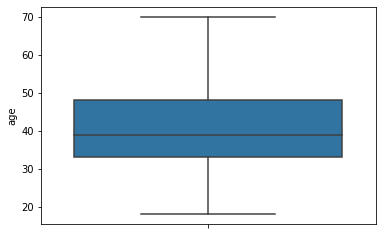

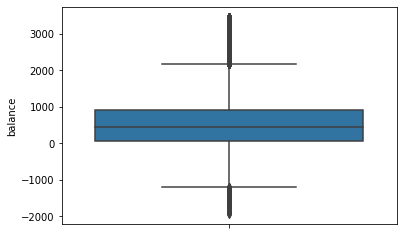

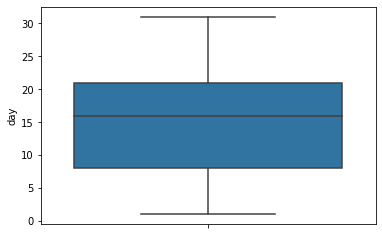

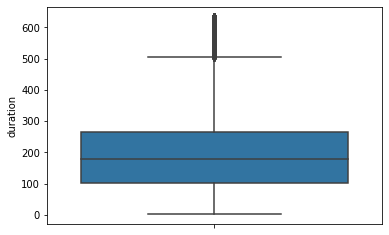

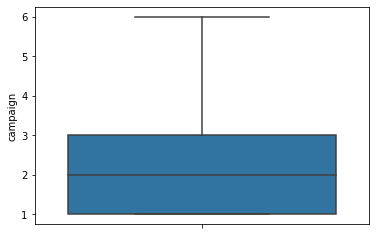

In [124]:
for i in num_cols[0:5]:
    sns.boxplot(y=i,data=mice_imputed_outlier_na)
    plt.show()

In [125]:
df_out_num = mice_imputed_outlier_na[['age', 'balance', 'day', 'duration', 'campaign']]

In [126]:
df_out_cat = mice_imputed_outlier_na[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome','y']]

In [127]:
from sklearn.preprocessing import PowerTransformer

In [128]:
pt = PowerTransformer(method='yeo-johnson')

print(pt.fit(df_out_num))
##rTransformer()
print(pt.lambdas_)
X_trans = pt.transform(df_out_num)

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
[ 0.04215861  0.92847149  0.69274544  0.38018571 -0.94287719]


In [129]:
pt.lambdas_

array([ 0.04215861,  0.92847149,  0.69274544,  0.38018571, -0.94287719])

In [130]:
df_outna_pt = pd.DataFrame(X_trans,columns = df_out_num.columns)

In [131]:
df_outna_pt.shape

(45208, 5)

In [132]:
df_outna_pt.head()

,age,balance,day,duration,campaign
0,1.581719,1.739154,-1.351839,0.604185,-1.130058
1,0.440331,-0.700512,-1.351839,-0.200988,-1.130058
2,-0.727137,-0.742169,-1.351839,-0.998648,-1.130058
3,0.711096,1.044919,-1.351839,-0.797472,-1.130058
4,-0.727137,-0.743916,-1.351839,0.176641,-1.130058


In [133]:
for i in df_outna_pt.columns:
    print("Feature : ",i)
    print("Skewness before : ", df[i].skew())
    print("Skewness after : ", df_outna_pt[i].skew())

Feature :  age
Skewness before :  0.6848172784935037
Skewness after :  -0.0025751075519511125
Feature :  balance
Skewness before :  8.360613627341758
Skewness after :  0.44914840729793376
Feature :  day
Skewness before :  0.0931291802783556
Skewness after :  -0.1578419085566546
Feature :  duration
Skewness before :  3.1443956140204374
Skewness after :  -0.019950322526613672
Feature :  campaign
Skewness before :  4.899967567082998
Skewness after :  0.14658404268264683


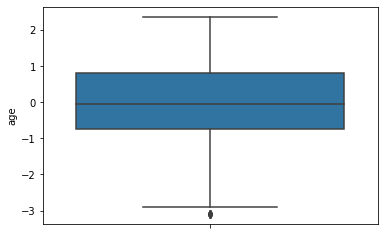

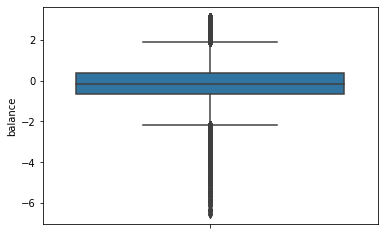

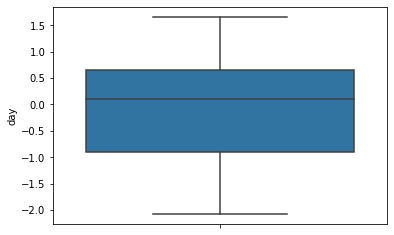

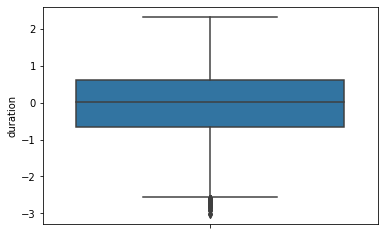

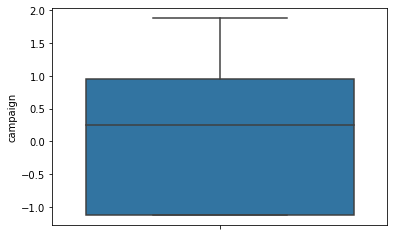

In [134]:
for i in df_outna_pt.columns:
    #sns.distplot(df_trans[i])
    sns.boxplot(y=i, data = df_outna_pt)
    plt.show()

In [135]:
df_outna_power = pd.concat([df_outna_pt,df_out_cat],axis=1,sort=False)

In [136]:
df_outna_power.shape

(45208, 15)

In [137]:
X=df_outna_power.drop(['y'],axis=1)
y=df_outna_power['y']

#### Ordinal Encoding

In [139]:
from sklearn.preprocessing import OrdinalEncoder

In [140]:
columns=['job', 'education','marital','default','month','housing','loan','contact','poutcome']
# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in columns:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = X[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    X.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [141]:
X.head()

,age,balance,day,duration,campaign,job,marital,education,default,housing,loan,contact,month,poutcome
0,1.581719,1.739154,-1.351839,0.604185,-1.130058,4,1,2,0,1,0,0,8,0
1,0.440331,-0.700512,-1.351839,-0.200988,-1.130058,9,2,1,0,1,0,0,8,0
2,-0.727137,-0.742169,-1.351839,-0.998648,-1.130058,2,1,1,0,1,1,0,8,0
3,0.711096,1.044919,-1.351839,-0.797472,-1.130058,1,1,1,0,1,0,0,8,0
4,-0.727137,-0.743916,-1.351839,0.176641,-1.130058,5,2,1,0,0,0,0,8,0


In [145]:
Xc=sm.add_constant(X)

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [148]:
vif1=[vif(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif1[1:]}, index=X.columns).T

,age,balance,day,duration,campaign,job,marital,education,default,housing,loan,contact,month,poutcome
vif,1.316813,1.067796,1.020396,1.018679,1.04675,1.053624,1.24958,1.085497,1.033474,1.136633,1.023207,1.03513,1.106211,1.027975


In [149]:
Xc

,const,age,balance,day,duration,campaign,job,marital,education,default,housing,loan,contact,month,poutcome
0,1.0,1.581719,1.739154,-1.351839,0.604185,-1.130058,4,1,2,0,1,0,0,8,0
1,1.0,0.440331,-0.700512,-1.351839,-0.200988,-1.130058,9,2,1,0,1,0,0,8,0
2,1.0,-0.727137,-0.742169,-1.351839,-0.998648,-1.130058,2,1,1,0,1,1,0,8,0
3,1.0,0.711096,1.044919,-1.351839,-0.797472,-1.130058,1,1,1,0,1,0,0,8,0
4,1.0,-0.727137,-0.743916,-1.351839,0.176641,-1.130058,5,2,1,0,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,1.0,1.047932,0.278015,0.220455,0.139298,0.958928,9,1,2,0,0,0,0,9,0
45204,1.0,1.128258,1.289976,0.220455,1.618498,0.253203,5,0,0,0,0,0,0,9,0
45205,1.0,0.440331,0.358487,0.220455,0.382528,1.678492,5,1,1,0,0,0,0,9,3
45206,1.0,1.509302,0.095670,0.220455,1.841011,1.388651,1,1,1,0,0,0,1,9,0


In [150]:
y=y.map({'yes':1,'no':0})

### Logistic Regression Model on dataset with outliers as NA,mice imputation and power transform Applied

In [151]:
model=sm.Logit(y,Xc,random_state=3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.295529
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45208
Model:                          Logit   Df Residuals:                    45193
Method:                           MLE   Df Model:                           14
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                  0.1811
Time:                        16:23:18   Log-Likelihood:                -13360.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5267      0.064    -39.269      0.000      -2.653      -2.401
age           -0.0599      0.018     -3.301      0.001      -0.095      -0.024
balance        0.1666      0.016     10.233      0.000       0.135       0.199
day           -0.0265      0.016     -1.664      0.096      -0.058       0.005
duration       0.7872      0.017     44.996      0.000       0.753       0.821
campaign      -0.1494      0.017     -8.910      0.000      -0.182      -0.117
job            0.0124      0.005      2.400      0.016       0.002       0.022
marital        0.0880      0.030      2.941      0.003       0.029       0.147
education      0.2232      0.026      8.646      0.000       0.173       0.274
default       -0.1155      0.151     -0.767      0.443      -0.411       0.180
housing       -0.8692      0.034    -25.388      0.000      -0.936      -0.802
loan          -0.4809      0.053     -9.141      0.000      -0.584      -0.378
contact        0.1931      0.064      2.995      0.003       0.067       0.320
month         -0.0047      0.005     -0.893      0.372      -0.015       0.006
poutcome       0.6998      0.017     40.804      0.000       0.666       0.733
==============================================================================
"""

In [153]:
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score, roc_curve,f1_score,classification_report
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3,stratify=y)

In [155]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31645, 14), (13563, 14), (31645,), (13563,))

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
lr=LogisticRegression(fit_intercept=True, solver='liblinear')
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
#y_train_prob = lr.predict_proba(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))
print('F1 score - Train : ','\n' , f1_score(y_train,y_train_pred,average='weighted'))

Confusion Matrix - Train :  
 [[27623   320]
 [ 3034   668]]
Overall Accuracy - Train :  0.8940116922104598
AUC - Train :  0.790824767475922
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     27943
           1       0.68      0.18      0.28      3702

    accuracy                           0.89     31645
   macro avg       0.79      0.58      0.61     31645
weighted avg       0.87      0.89      0.87     31645

F1 score - Train :  
 0.8657995100707988


Confusion Matrix - Test :  
 [[11833   143]
 [ 1323   264]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11976
           1       0.65      0.17      0.26      1587

    accuracy                           0.89     13563
   macro avg       0.77      0.58      0.60     13563
weighted avg       0.87      0.89      0.86     13563

F1 score - Test :  0.8624673427847791
Overall Accuracy - Test :  0.8919118189191182
AUC - Test :  0.779042857822345


Text(0, 0.5, 'TPR')

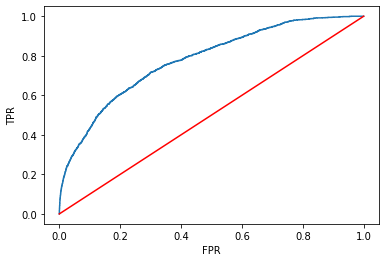

In [158]:
y_test_pred=lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred,average='weighted'))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

#### Using backward elimination for feature selection

In [160]:
#p=model.pvalues
cols=list(Xc.columns)

while len(cols)>1:
    X_1=Xc[cols]
    model=sm.Logit(y,X_1,random_state=3).fit()
    p=model.pvalues
    max_p=max(p)
    feature_maxp=p.idxmax()
    
    if max_p>0.05:
        print("\n")
        print('column removed : ',feature_maxp,max_p)
        cols.remove(feature_maxp)
    else:
        break
cols

Optimization terminated successfully.
         Current function value: 0.295529
         Iterations 7


column removed :  default 0.4433552797136333
Optimization terminated successfully.
         Current function value: 0.295536
         Iterations 7


column removed :  month 0.3654152317803956
Optimization terminated successfully.
         Current function value: 0.295545
         Iterations 7


column removed :  day 0.0898297368461231
Optimization terminated successfully.
         Current function value: 0.295577
         Iterations 7


['const',
 'age',
 'balance',
 'duration',
 'campaign',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X[cols[1:]], y, test_size=0.3, random_state=3,stratify=y)

In [162]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31645, 11), (13563, 11), (31645,), (13563,))

In [163]:
lr=LogisticRegression(fit_intercept=True, solver='liblinear')
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)
#y_train_prob = lr.predict_proba(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))
print('F1 score - Train : ','\n' , f1_score(y_train,y_train_pred,average='weighted'))

Confusion Matrix - Train :  
 [[27626   317]
 [ 3033   669]]
Overall Accuracy - Train :  0.8941380944857007
AUC - Train :  0.7905830931235276
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     27943
           1       0.68      0.18      0.29      3702

    accuracy                           0.89     31645
   macro avg       0.79      0.58      0.61     31645
weighted avg       0.88      0.89      0.87     31645

F1 score - Train :  
 0.8659256322886023


Confusion Matrix - Test :  
 [[11835   141]
 [ 1319   268]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11976
           1       0.66      0.17      0.27      1587

    accuracy                           0.89     13563
   macro avg       0.78      0.58      0.61     13563
weighted avg       0.87      0.89      0.86     13563

F1 score - Test :  0.8631119954621317
Overall Accuracy - Test :  0.892354198923542
AUC - Test :  0.7789417313938947


Text(0, 0.5, 'TPR')

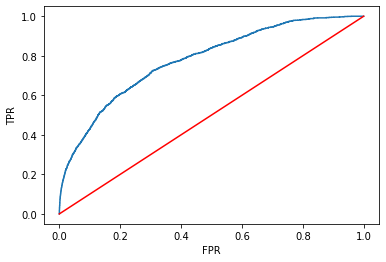

In [164]:
y_test_pred=lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred,average='weighted'))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

### Decision Tree model on dataset with outliers as NA,mice imputation and power transform Applied

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3,stratify=y)

In [174]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31645, 14), (13563, 14), (31645,), (13563,))

In [184]:
dtc= DecisionTreeClassifier(random_state=3)


params = {##'n_estimators' : sp_randint(50,200),
          'max_features' : sp_randint(1,24),
          'max_depth' : sp_randint(2,20),
          'min_samples_split' :sp_randint(2,20),
          'min_samples_leaf' :  sp_randint(1,20),
          'criterion' : ['gini','entropy']}

rsearch = RandomizedSearchCV(dtc,param_distributions=params,n_iter=50,cv=3,scoring='roc_auc',n_jobs=-1,random_state=3)

rsearch.fit(X,y)



RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=3,
             

In [185]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 12}

In [186]:
dt=DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)
y_train_pred=dt.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))

Confusion Matrix - Train :  
 [[27625   318]
 [ 2881   821]]
Overall Accuracy - Train :  0.8989097803760467
AUC - Train :  0.8201305909597203
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     27943
           1       0.72      0.22      0.34      3702

    accuracy                           0.90     31645
   macro avg       0.81      0.61      0.64     31645
weighted avg       0.88      0.90      0.87     31645



Confusion Matrix - Test :  
 [[11798   178]
 [ 1270   317]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11976
           1       0.64      0.20      0.30      1587

    accuracy                           0.89     13563
   macro avg       0.77      0.59      0.62     13563
weighted avg       0.87      0.89      0.87     13563

F1 score - Test :  0.8675686712871183
Overall Accuracy - Test :  0.8932389589323896
AUC - Test :  0.8047395199977776


Text(0, 0.5, 'TPR')

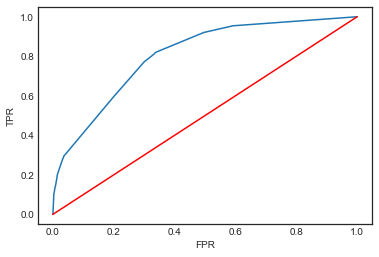

In [187]:
y_test_pred=dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred,average='weighted'))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [188]:
dt.feature_importances_

array([0.00704681, 0.00213223, 0.00792752, 0.31338855, 0.        ,
       0.        , 0.00160726, 0.        , 0.        , 0.0872668 ,
       0.00992259, 0.        , 0.07525564, 0.49545261])

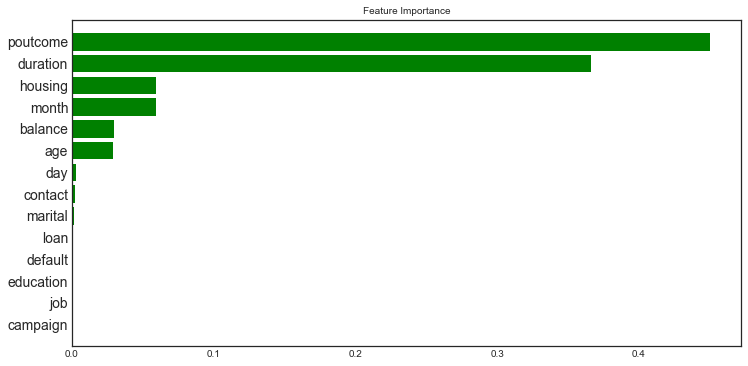

In [189]:
plt.style.use('seaborn-white')

##clf = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)

##clf.fit(X, y)
dt.fit(X,y)
importances = dt.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

### Decision Tree model on dataset with outliers as NA,mice imputation ,without power transform applied

In [190]:
mice_imputed_outlier_na

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,contactPrev,poutcome,y,day
0,58.0,management,married,tertiary,no,2143.0,yes,no,cellular,may,261.0,1.0,No,Not Contacted,no,5
1,44.0,technician,single,secondary,no,29.0,yes,no,cellular,may,151.0,1.0,No,Not Contacted,no,5
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,may,76.0,1.0,No,Not Contacted,no,5
3,47.0,blue-collar,married,secondary,no,1506.0,yes,no,cellular,may,92.0,1.0,No,Not Contacted,no,5
4,33.0,retired,single,secondary,no,1.0,no,no,cellular,may,198.0,1.0,No,Not Contacted,no,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,51.0,technician,married,tertiary,no,825.0,no,no,cellular,nov,193.0,3.0,No,Not Contacted,yes,17
45204,52.0,retired,divorced,primary,no,1729.0,no,no,cellular,nov,456.0,2.0,No,Not Contacted,yes,17
45205,44.0,retired,married,secondary,no,895.0,no,no,cellular,nov,227.0,5.0,Yes,success,yes,17
45206,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,nov,508.0,4.0,No,Not Contacted,no,17


In [213]:
X=mice_imputed_outlier_na.drop(['y','contactPrev'],axis=1)
y=mice_imputed_outlier_na['y']

#### Ordinal Encoding

In [214]:
from sklearn.preprocessing import OrdinalEncoder

In [215]:
columns=['job', 'education','marital','default','month','housing','loan','contact','poutcome']
# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in columns:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = X[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    X.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [216]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,poutcome,day
0,58.0,4,1,2,0,2143.0,1,0,0,8,261.0,1.0,0,5
1,44.0,9,2,1,0,29.0,1,0,0,8,151.0,1.0,0,5
2,33.0,2,1,1,0,2.0,1,1,0,8,76.0,1.0,0,5
3,47.0,1,1,1,0,1506.0,1,0,0,8,92.0,1.0,0,5
4,33.0,5,2,1,0,1.0,0,0,0,8,198.0,1.0,0,5


In [217]:
y=y.map({'yes':1,'no':0})

In [218]:
y.value_counts()

0    39919
1     5289
Name: y, dtype: int64

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3,stratify=y)

In [220]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31645, 14), (13563, 14), (31645,), (13563,))

In [221]:
dtc= DecisionTreeClassifier(random_state=3)


params = {##'n_estimators' : sp_randint(50,200),
          'max_features' : sp_randint(1,24),
          'max_depth' : sp_randint(2,20),
          'min_samples_split' :sp_randint(2,20),
          'min_samples_leaf' :  sp_randint(1,20),
          'criterion' : ['gini','entropy']}

rsearch = RandomizedSearchCV(dtc,param_distributions=params,n_iter=50,cv=3,scoring='roc_auc',n_jobs=-1,random_state=3)

rsearch.fit(X,y)



RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=3,
             

In [222]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 16}

In [223]:
dt=DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train,y_train)
y_train_pred=dt.predict(X_train)
#y_train_prob = dt.predict_proba(X_train)
y_train_prob = dt.predict_proba(X_train)[:,1]
print('Confusion Matrix - Train : ','\n' , confusion_matrix(y_train,y_train_pred))
print('Overall Accuracy - Train : ' , accuracy_score(y_train,y_train_pred))
print('AUC - Train : ' , roc_auc_score(y_train,y_train_prob))
print('Classification Report - Train : ','\n' , classification_report(y_train,y_train_pred))

Confusion Matrix - Train :  
 [[27943     0]
 [ 3702     0]]
Overall Accuracy - Train :  0.8830146942644967
AUC - Train :  0.753991657942706
Classification Report - Train :  
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     27943
           1       0.00      0.00      0.00      3702

    accuracy                           0.88     31645
   macro avg       0.44      0.50      0.47     31645
weighted avg       0.78      0.88      0.83     31645



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix - Test :  
 [[11976     0]
 [ 1587     0]]
Classification Report - Test :  
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     11976
           1       0.00      0.00      0.00      1587

    accuracy                           0.88     13563
   macro avg       0.44      0.50      0.47     13563
weighted avg       0.78      0.88      0.83     13563

F1 score - Test :  0.8281212337387479
Overall Accuracy - Test :  0.8829904888299049
AUC - Test :  0.7436035955548989


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'TPR')

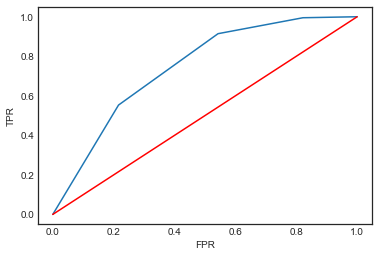

In [224]:
y_test_pred=dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:,1]
print('Confusion Matrix - Test : ','\n' , confusion_matrix(y_test,y_test_pred))
print('Classification Report - Test : ','\n' , classification_report(y_test,y_test_pred))
print('F1 score - Test : ', f1_score(y_test,y_test_pred,average='weighted'))
print('Overall Accuracy - Test : ' , accuracy_score(y_test,y_test_pred))
print('AUC - Test : ' , roc_auc_score(y_test,y_test_prob))

fpr, tpr, thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [225]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.20487348, 0.        , 0.        , 0.        ,
       0.79512652, 0.        , 0.        , 0.        ])

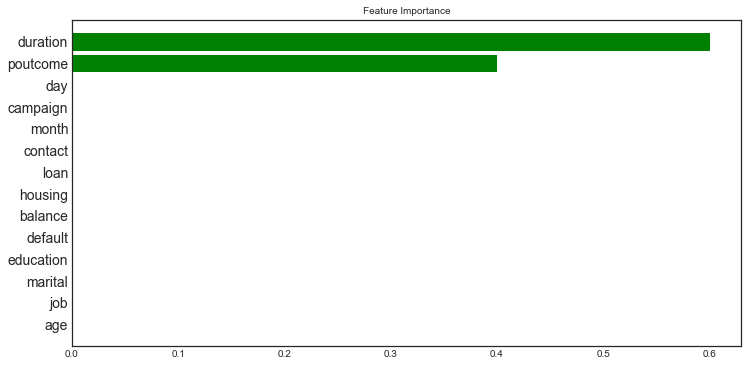

In [226]:
plt.style.use('seaborn-white')

##clf = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)

##clf.fit(X, y)
dt.fit(X,y)
importances = dt.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()